In [1]:
# Importing packages
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Limiting GPU memory
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Importing other packages
import cv2
import imghdr

In [8]:
# Defining path
data_dir='C:\\Users\\Ayaan\\Projects\\Omdena\\Task- Model Training\\archive (19)\\Train\\Train'

In [9]:
# Showing dimensions of a sample image
arr=cv2.imread(os.path.join(data_dir,'Anthracnose','20211008_124249 (Custom).jpg'))
arr.shape

(320, 240, 3)

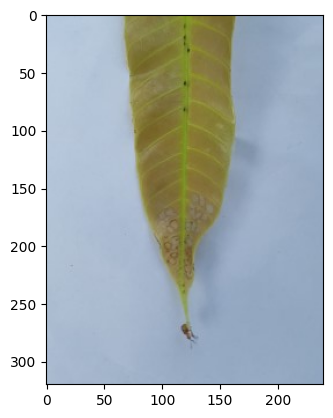

In [10]:
# Displaying image
plt.imshow(cv2.cvtColor(arr,cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
# Train and test paths
data=tf.keras.utils.image_dataset_from_directory('C:\\Users\\Ayaan\\Projects\\Omdena\\Task- Model Training\\archive (19)\\Train\\Train',batch_size=128,image_size=(320,240))
data1=tf.keras.utils.image_dataset_from_directory('C:\\Users\Ayaan\\Projects\\Omdena\\Task- Model Training\\archive (19)\\Test\\Test',batch_size=128,image_size=(320,240))

Found 3299 files belonging to 8 classes.
Found 379 files belonging to 8 classes.


In [13]:
# converting it to iterator form
iterator=data.as_numpy_iterator()
iterator1=data1.as_numpy_iterator()

In [14]:
# Showing shapes of train and test
batch=iterator.next()
batch1=iterator1.next()
print(batch[0].shape)
print(batch1[0].shape)

(128, 320, 240, 3)
(128, 320, 240, 3)


In [15]:
# Showing Labels
batch[1]

array([7, 2, 0, 7, 3, 0, 1, 0, 3, 4, 5, 5, 3, 3, 6, 0, 3, 3, 7, 7, 4, 6,
       6, 7, 5, 5, 1, 6, 0, 7, 3, 6, 3, 5, 1, 4, 1, 2, 0, 6, 1, 3, 7, 5,
       1, 3, 7, 5, 4, 0, 1, 7, 6, 6, 5, 1, 5, 1, 3, 3, 5, 6, 3, 6, 5, 7,
       0, 0, 1, 1, 7, 3, 6, 1, 6, 2, 5, 2, 0, 0, 5, 0, 0, 6, 5, 1, 2, 0,
       4, 5, 3, 3, 4, 7, 4, 3, 1, 2, 2, 1, 0, 6, 1, 0, 3, 5, 1, 7, 1, 4,
       4, 5, 7, 1, 0, 0, 0, 7, 6, 3, 6, 2, 1, 5, 0, 3, 4, 7])

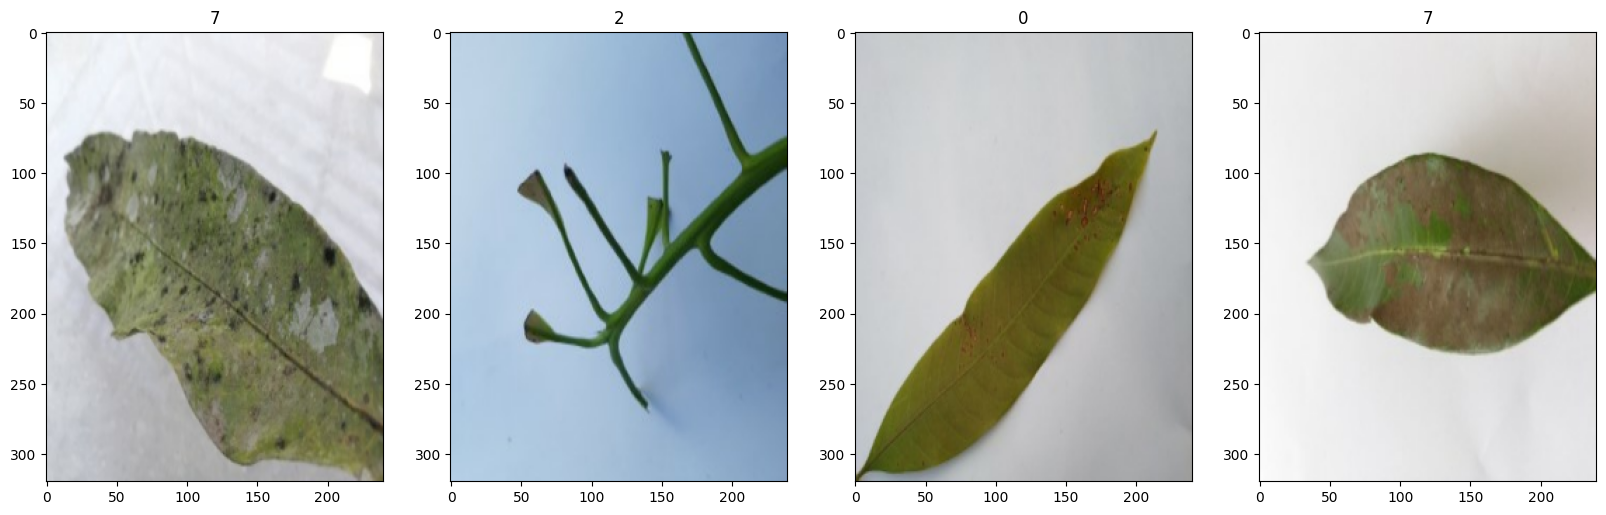

In [16]:
# Displaying images with their respective labels
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
# Scaling images
scaling=batch[0]/255

In [18]:
scaling.min()

0.0

In [19]:
# Normalizing images
data =data.map(lambda x,y:(x/255,y))
data1=data1.map(lambda x,y:(x/255,y))

In [20]:
# Showing max value of normalized images of train
batch=data.as_numpy_iterator().next()
batch[0].max()

1.0

In [21]:
# Showing max value of normalized images of test
batch1=data1.as_numpy_iterator().next()
batch1[0].max()

1.0

In [22]:
# Train 
batch

(array([[[[0.6464052 , 0.5718954 , 0.41503268],
          [0.64117646, 0.5647059 , 0.4137255 ],
          [0.6392157 , 0.56078434, 0.41568628],
          ...,
          [0.43790883, 0.41045785, 0.3006539 ],
          [0.45490196, 0.42745098, 0.31764707],
          [0.45882353, 0.43137255, 0.32156864]],
 
         [[0.6439542 , 0.5694444 , 0.4125817 ],
          [0.6387255 , 0.5622549 , 0.41127452],
          [0.6367647 , 0.55833334, 0.4132353 ],
          ...,
          [0.43259832, 0.4051473 , 0.2953434 ],
          [0.44632354, 0.41887254, 0.30906862],
          [0.44697708, 0.4195261 , 0.3097222 ]],
 
         [[0.63929737, 0.563317  , 0.41086602],
          [0.63284314, 0.55563724, 0.40686274],
          [0.6333333 , 0.55490196, 0.40980393],
          ...,
          [0.43333352, 0.40147078, 0.29313743],
          [0.44191176, 0.4107843 , 0.3009804 ],
          [0.43864375, 0.40825158, 0.29697707]],
 
         ...,
 
         [[0.88398695, 0.8981209 , 0.9014706 ],
          [0.87867

In [23]:
# Test
batch1

(array([[[[0.7921569 , 0.80784315, 0.84313726],
          [0.79019606, 0.80588233, 0.84117645],
          [0.7882353 , 0.8039216 , 0.8392157 ],
          ...,
          [0.7607843 , 0.7607843 , 0.76862746],
          [0.7588235 , 0.7588235 , 0.76666665],
          [0.75686276, 0.75686276, 0.7647059 ]],
 
         [[0.7921569 , 0.80784315, 0.84313726],
          [0.7914216 , 0.80710787, 0.842402  ],
          [0.79068625, 0.8063725 , 0.84166664],
          ...,
          [0.7607843 , 0.7607843 , 0.76862746],
          [0.7588235 , 0.7588235 , 0.76666665],
          [0.75686276, 0.75686276, 0.7647059 ]],
 
         [[0.7921569 , 0.80784315, 0.84313726],
          [0.7921569 , 0.80784315, 0.84313726],
          [0.7921569 , 0.80784315, 0.84313726],
          ...,
          [0.7607843 , 0.7607843 , 0.76862746],
          [0.7595588 , 0.7595588 , 0.76740193],
          [0.75710785, 0.75710785, 0.764951  ]],
 
         ...,
 
         [[0.85490197, 0.87058824, 0.90588236],
          [0.85686

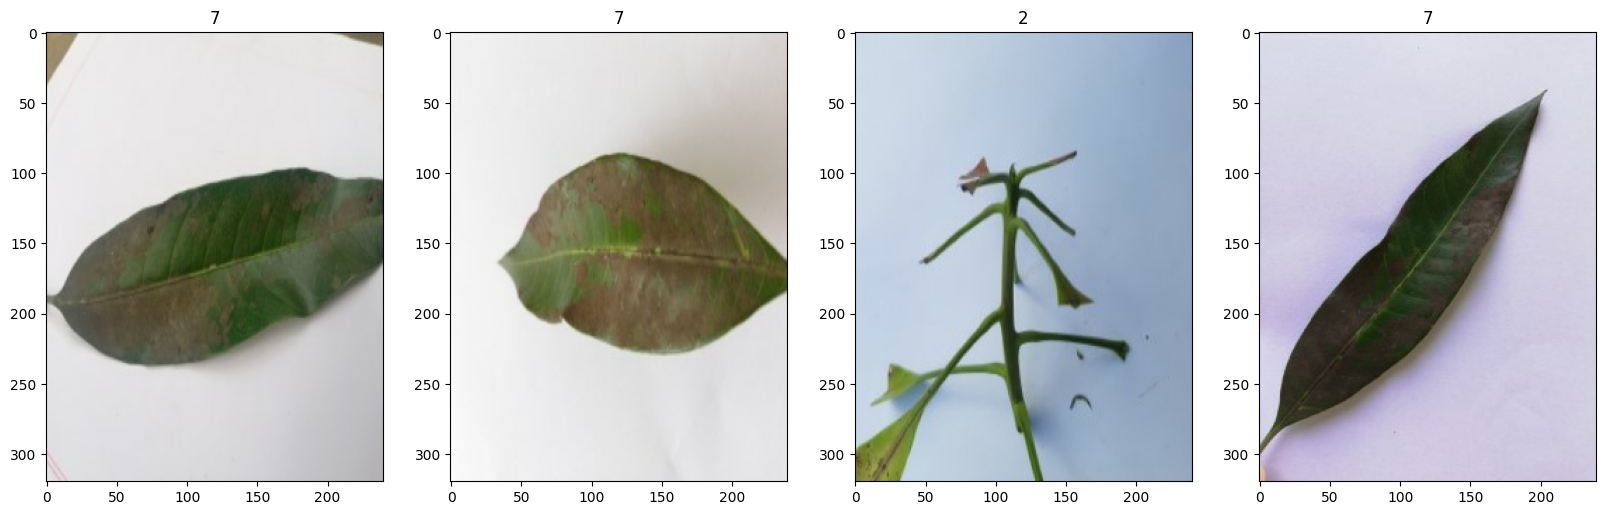

In [24]:
# Displaying images with their respective labels
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [25]:
# Showing batches
print(len(data))
len(data1)

26


3

In [57]:
# Assigning train and test data
train=data
test=data1

In [58]:
# Importing dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 

In [59]:
model=Sequential()

In [60]:
# Creating neural network
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(320,240,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(8,activation='softmax'))

In [61]:
# Defining optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
# Showing model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 318, 238, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 159, 119, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 157, 117, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 78, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 76, 56, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 38, 28, 16)      

In [63]:
# os.mkdir('logs')

In [64]:
# Defining path
logdir='logs'

In [65]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
# Training 
hist=model.fit(train,epochs=65,callbacks=[tensorboard_callback])

Epoch 1/65


KeyboardInterrupt: 

In [ ]:
# Showing losses and accuracies during training 
hist.history

In [3]:
# saving model
model.save('model7.h5')
# model = tf.keras.models.load_model('model7.h5')

In [72]:
# Displaying loss and accuracy
fig,ax=plt.subplots(figsize=(5,5))
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['loss'],color='r',label='Loss')
plt.suptitle('Loss and Accuracy')
plt.legend(loc='upper left')
plt.show()

In [73]:
# importing SparseCategoricalAccuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [74]:
spa=SparseCategoricalAccuracy()

In [75]:
# Getting predictions
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)

    spa.update_state(y,yhat)


4/4 [==============================] - 1s 220ms/step


In [4]:
# Displaying Accuracy
print(f'Accuracy {spa.result().numpy()}')